In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ,OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt



In [3]:
df=pd.read_csv("/kaggle/input/telecom-customer-churn-by-maven-analytics/telecom_customer_churn.csv")

In [4]:
df.shape

(7043, 38)

In [5]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [6]:
def summary(df):
    df=pd.DataFrame({
        "dtype":df.dtypes,
        "non-null-counts":df.count(),
        "null_count":df.isna().sum(),
        "unique_count":df.nunique()
    })
    return df

In [7]:
summary(df)

,dtype,non-null-counts,null_count,unique_count
Customer ID,object,7043,0,7043
Gender,object,7043,0,2
Age,int64,7043,0,62
Married,object,7043,0,2
Number of Dependents,int64,7043,0,10
City,object,7043,0,1106
Zip Code,int64,7043,0,1626
Latitude,float64,7043,0,1626
Longitude,float64,7043,0,1625
Number of Referrals,int64,7043,0,12


In [8]:
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [9]:
df.isna().sum().sum()

np.int64(30849)

In [10]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [11]:
df=df[[
    #'Customer ID',
    'Gender', 'Age', 'Married', 'Number of Dependents',
       #'City', 'Zip Code', 
    'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason']]

In [12]:
internet_cat_cols=['Internet Type','Online Security','Online Backup','Device Protection Plan',
       'Premium Tech Support','Streaming TV','Streaming Movies',
       'Streaming Music','Unlimited Data']
internet_num_cols=['Avg Monthly GB Download']
phone_cat_cols=['Multiple Lines']
phone_num_cols=[ 'Avg Monthly Long Distance Charges']
offers_cols=["Offer"]
impute_cat_cols=SimpleImputer(strategy="constant",fill_value="None")
impute_num_cols=SimpleImputer(strategy="constant",fill_value=0)

preprocessing_1=ColumnTransformer(transformers=[
   ( "int_cat",impute_cat_cols,internet_cat_cols),
    ("int_num",impute_num_cols,internet_num_cols),
    ("offer_col",impute_cat_cols,offers_cols),
    ("ph_cat",impute_cat_cols,phone_cat_cols),
    ("ph_num",impute_num_cols,phone_num_cols)
    
],
  remainder="passthrough"                                
                                 )
preprocessing_1.set_output(transform="pandas")
df_new=preprocessing_1.fit_transform(df)



In [13]:
df_new.head()

,int_cat__Internet Type,int_cat__Online Security,int_cat__Online Backup,int_cat__Device Protection Plan,int_cat__Premium Tech Support,int_cat__Streaming TV,int_cat__Streaming Movies,int_cat__Streaming Music,int_cat__Unlimited Data,int_num__Avg Monthly GB Download,...,remainder__Payment Method,remainder__Monthly Charge,remainder__Total Charges,remainder__Total Refunds,remainder__Total Extra Data Charges,remainder__Total Long Distance Charges,remainder__Total Revenue,remainder__Customer Status,remainder__Churn Category,remainder__Churn Reason
0,Cable,No,Yes,No,Yes,Yes,No,No,Yes,16.0,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,Cable,No,No,No,No,No,Yes,Yes,No,10.0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,Fiber Optic,No,No,Yes,No,No,No,No,Yes,30.0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,Fiber Optic,No,Yes,Yes,No,Yes,Yes,No,Yes,4.0,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,Fiber Optic,No,No,No,Yes,Yes,No,No,Yes,11.0,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [14]:
summary(df_new)

,dtype,non-null-counts,null_count,unique_count
int_cat__Internet Type,object,7043,0,4
int_cat__Online Security,object,7043,0,3
int_cat__Online Backup,object,7043,0,3
int_cat__Device Protection Plan,object,7043,0,3
int_cat__Premium Tech Support,object,7043,0,3
int_cat__Streaming TV,object,7043,0,3
int_cat__Streaming Movies,object,7043,0,3
int_cat__Streaming Music,object,7043,0,3
int_cat__Unlimited Data,object,7043,0,3
int_num__Avg Monthly GB Download,float64,7043,0,50


In [15]:
df_new.drop(columns=['remainder__Churn Category','remainder__Churn Reason'],axis=1,inplace=True)

In [16]:
df_new.shape

(7043, 33)

In [17]:
summary(df_new)

,dtype,non-null-counts,null_count,unique_count
int_cat__Internet Type,object,7043,0,4
int_cat__Online Security,object,7043,0,3
int_cat__Online Backup,object,7043,0,3
int_cat__Device Protection Plan,object,7043,0,3
int_cat__Premium Tech Support,object,7043,0,3
int_cat__Streaming TV,object,7043,0,3
int_cat__Streaming Movies,object,7043,0,3
int_cat__Streaming Music,object,7043,0,3
int_cat__Unlimited Data,object,7043,0,3
int_num__Avg Monthly GB Download,float64,7043,0,50


In [18]:
df_new.head(33)

,int_cat__Internet Type,int_cat__Online Security,int_cat__Online Backup,int_cat__Device Protection Plan,int_cat__Premium Tech Support,int_cat__Streaming TV,int_cat__Streaming Movies,int_cat__Streaming Music,int_cat__Unlimited Data,int_num__Avg Monthly GB Download,...,remainder__Contract,remainder__Paperless Billing,remainder__Payment Method,remainder__Monthly Charge,remainder__Total Charges,remainder__Total Refunds,remainder__Total Extra Data Charges,remainder__Total Long Distance Charges,remainder__Total Revenue,remainder__Customer Status
0,Cable,No,Yes,No,Yes,Yes,No,No,Yes,16.0,...,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed
1,Cable,No,No,No,No,No,Yes,Yes,No,10.0,...,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed
2,Fiber Optic,No,No,Yes,No,No,No,No,Yes,30.0,...,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned
3,Fiber Optic,No,Yes,Yes,No,Yes,Yes,No,Yes,4.0,...,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned
4,Fiber Optic,No,No,No,Yes,Yes,No,No,Yes,11.0,...,Month-to-Month,Yes,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned
5,Cable,No,No,No,Yes,Yes,Yes,Yes,Yes,73.0,...,Month-to-Month,Yes,Credit Card,69.40,571.45,0.00,0,150.93,722.38,Stayed
6,Fiber Optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,14.0,...,Two Year,Yes,Bank Withdrawal,109.70,7904.25,0.00,0,707.16,8611.41,Stayed
7,Fiber Optic,Yes,No,No,Yes,No,No,No,No,7.0,...,Two Year,Yes,Credit Card,84.65,5377.80,0.00,20,816.48,6214.28,Stayed
8,DSL,Yes,No,No,No,No,No,No,Yes,21.0,...,Two Year,Yes,Bank Withdrawal,48.20,340.35,0.00,0,73.71,414.06,Stayed
9,Cable,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,14.0,...,Two Year,Yes,Credit Card,90.45,5957.90,0.00,0,1849.90,7807.80,Stayed


In [19]:
df_new["remainder__Contract"]

0             One Year
1       Month-to-Month
2       Month-to-Month
3       Month-to-Month
4       Month-to-Month
             ...      
7038          One Year
7039    Month-to-Month
7040    Month-to-Month
7041          Two Year
7042          Two Year
Name: remainder__Contract, Length: 7043, dtype: object

In [20]:
ord_categ=["Month-to-Month","One Year","Two Year"]
ord_enc=OrdinalEncoder(categories=[ord_categ])
df_new["remainder__Contract"]=ord_enc.fit_transform(df_new[['remainder__Contract']])


In [21]:
df_new=df_new[df_new['remainder__Customer Status']!="Joined"].copy()
X=df_new.drop("remainder__Customer Status",axis=1)
y=df_new['remainder__Customer Status']

In [22]:
X.shape

(6589, 32)

In [23]:
y.shape

(6589,)

In [24]:
df_cat_cols=X.select_dtypes(include=["object"]).columns
df_num_cols=X.select_dtypes(include=['int64',"float64"]).columns
one_hot=OneHotEncoder(drop='first', sparse_output=False)
std_scale=StandardScaler()
preprocessing2=ColumnTransformer(transformers=[
    ("cat_cols",one_hot,df_cat_cols),
    ("num_cols",std_scale,df_num_cols)
])
preprocessing2.set_output(transform="pandas")
X_prep=preprocessing2.fit_transform(X)

In [25]:
X_prep.shape

(6589, 48)

In [26]:
X_prep.columns.tolist()

['cat_cols__int_cat__Internet Type_DSL',
 'cat_cols__int_cat__Internet Type_Fiber Optic',
 'cat_cols__int_cat__Internet Type_None',
 'cat_cols__int_cat__Online Security_None',
 'cat_cols__int_cat__Online Security_Yes',
 'cat_cols__int_cat__Online Backup_None',
 'cat_cols__int_cat__Online Backup_Yes',
 'cat_cols__int_cat__Device Protection Plan_None',
 'cat_cols__int_cat__Device Protection Plan_Yes',
 'cat_cols__int_cat__Premium Tech Support_None',
 'cat_cols__int_cat__Premium Tech Support_Yes',
 'cat_cols__int_cat__Streaming TV_None',
 'cat_cols__int_cat__Streaming TV_Yes',
 'cat_cols__int_cat__Streaming Movies_None',
 'cat_cols__int_cat__Streaming Movies_Yes',
 'cat_cols__int_cat__Streaming Music_None',
 'cat_cols__int_cat__Streaming Music_Yes',
 'cat_cols__int_cat__Unlimited Data_None',
 'cat_cols__int_cat__Unlimited Data_Yes',
 'cat_cols__offer_col__Offer_Offer A',
 'cat_cols__offer_col__Offer_Offer B',
 'cat_cols__offer_col__Offer_Offer C',
 'cat_cols__offer_col__Offer_Offer D',
 '

In [27]:
y.value_counts()

remainder__Customer Status
Stayed     4720
Churned    1869
Name: count, dtype: int64

In [28]:
maps={"Churned":1,"Stayed" :0}
y=y.map(maps)

In [29]:
y.value_counts()

remainder__Customer Status
0    4720
1    1869
Name: count, dtype: int64

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X_prep,y,test_size=0.2,random_state=42,stratify=y)

In [31]:
X_train.shape

(5271, 48)

In [32]:
y_train.shape

(5271,)

In [33]:
def build_model(hp):
    model=Sequential()
    hp_actiavtion_function=hp.Choice("activation",values=['relu','tanh',])
    hp_learning_rate=hp.Choice("learning_rate",values=[1e-2,1e-3,1e-4])
    hp_layer_1=hp.Int("layer_1",max_value=120,min_value=8,step=8)
    hp_layer_2=hp.Int("layer_2",max_value=240,min_value=16,step=8)
    model.add(Dense(units=hp_layer_1,activation= hp_actiavtion_function,input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.5))
    model.add(Dense(units=hp_layer_2,activation=hp_actiavtion_function))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation="sigmoid"))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),loss="binary_crossentropy",metrics=["accuracy"])
    return model

In [38]:
tuner=kt.Hyperband(build_model,
                  objective="val_loss",
                  factor=3,
                  directory="yyy",
                  project_name="x")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
callback=EarlyStopping(monitor="val_loss",patience=10,restore_best_weights=True,start_from_epoch=10)

In [40]:
tuner.search(X_train,y_train,epochs=10,validation_split=0.2,callbacks=[callback])

Trial 254 Complete [00h 00m 33s]
val_loss: 0.3154018521308899

Best val_loss So Far: 0.3069780766963959
Total elapsed time: 00h 40m 09s


In [41]:
best_hp=tuner.get_best_hyperparameters(num_trials=1)[0]
model=tuner.hypermodel.build(best_hp)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
history=model.fit(X_train,y_train,epochs=100,validation_split=0.2,callbacks=[callback])

Epoch 1/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7600 - loss: 0.4830 - val_accuracy: 0.8389 - val_loss: 0.3595
Epoch 2/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8329 - loss: 0.3861 - val_accuracy: 0.8455 - val_loss: 0.3467
Epoch 3/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8428 - loss: 0.3618 - val_accuracy: 0.8455 - val_loss: 0.3384
Epoch 4/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8405 - loss: 0.3537 - val_accuracy: 0.8445 - val_loss: 0.3350
Epoch 5/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8387 - loss: 0.3596 - val_accuracy: 0.8436 - val_loss: 0.3351
Epoch 6/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8453 - loss: 0.3582 - val_accuracy: 0.8502 - val_loss: 0.3304
Epoch 7/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8488 - loss: 0.3519 - val_accuracy: 0.8464 - val_loss: 0.3322
Epoch 8/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8528 - loss: 0.3463 - val_accu

In [64]:
model=Sequential([
    Dense(units=64,activation="relu",input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32,activation="relu"),
    Dropout(0.5),
    Dense(16,activation="relu"),
     Dropout(0.5),
    Dense(1,activation="sigmoid")
    
])
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])


In [65]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,761 (22.50 KB)

 Trainable params: 5,761 (22.50 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
callback=EarlyStopping(monitor="val_loss",patience=10,restore_best_weights=True,start_from_epoch=10)
history=model.fit(X_train,y_train,batch_size=32,epochs=50,validation_split=0.2,callbacks=[callback])

Epoch 1/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8911 - loss: 0.2753 - val_accuracy: 0.8540 - val_loss: 0.3444
Epoch 2/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8874 - loss: 0.2636 - val_accuracy: 0.8540 - val_loss: 0.3408
Epoch 3/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8895 - loss: 0.2885 - val_accuracy: 0.8578 - val_loss: 0.3471
Epoch 4/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8807 - loss: 0.2719 - val_accuracy: 0.8531 - val_loss: 0.3491
Epoch 5/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8894 - loss: 0.2732 - val_accuracy: 0.8512 - val_loss: 0.3469
Epoch 6/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8730 - loss: 0.2949 - val_accuracy: 0.8455 - val_loss: 0.3484
Epoch 7/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8873 - loss: 0.2857 - val_accuracy: 0.8540 - val_loss: 0.3400
Epoch 8/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8872 - loss: 0.2718 - val_accuracy: 0.

In [67]:
history

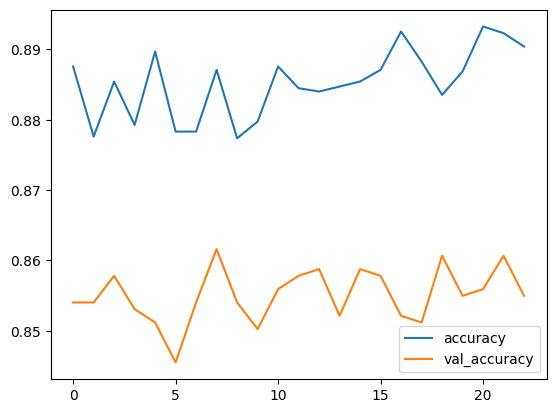

In [73]:
plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history['val_accuracy'],label="val_accuracy")
plt.legend()

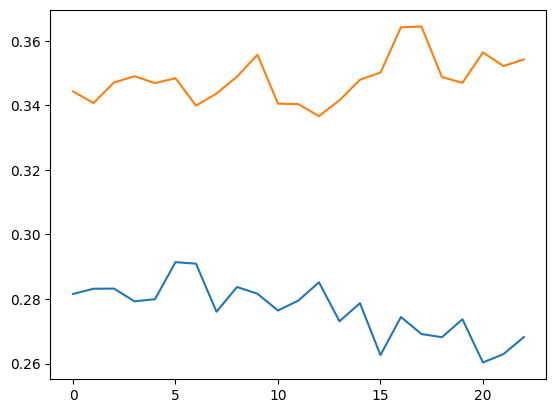

In [74]:
plt.plot(history.history["loss"])
plt.plot(history.history['val_loss'])

In [76]:
y_pred_prob=model.predict(X_test)
y_pred=(y_pred_prob > 0.5).astype("int32")
cm=confusion_matrix(y_test,y_pred)

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


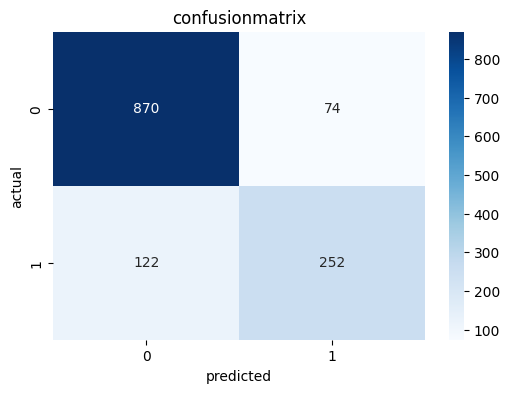

In [80]:
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusionmatrix")
plt.show()

In [81]:
cm

array([[870,  74],
       [122, 252]])

In [83]:
# Lower the bar to 0.3 to catch more churners
y_pred_aggressive = (model.predict(X_test) > 0.3).astype("int32")
print(confusion_matrix(y_test, y_pred_aggressive))


42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[820 124]
 [ 96 278]]


In [86]:
model.save("churn_model_prediction.keras")
import joblib
joblib.dump(preprocessing2,"preprocessor.jobib")

['preprocessor.jobib']